In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the data

In [2]:
from sklearn.datasets import load_boston
bost = load_boston()
type(bost) # sklearn.utils.Bunch
bost.keys() # Output dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
print(bost.data) # To see the data in the dataset
print(bost.target) # to see the dependent feature ie) pricing
print(bost.feature_names) # Column heading

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

c:\MLProjects\bostonprediction\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

# Converting inot dataframe

In [3]:
df = pd.DataFrame(bost.data,columns=bost.feature_names)
df['PRICE'] = bost.target
df.head()
df.info()
df.describe() # Statistics of the data
df.isnull().sum() # Checking is there any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

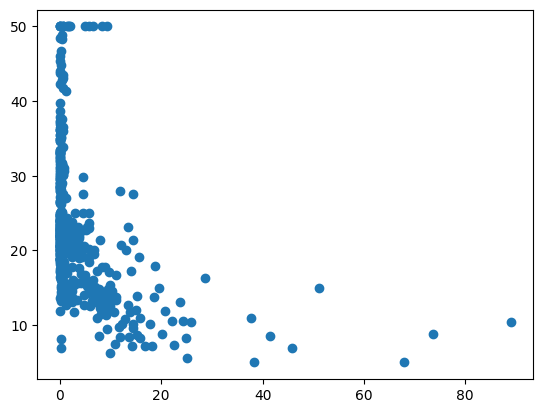

In [4]:
# Correlation -- It is important in any regression problem because we really need to find out how the independent features
# are correlated with the dependent feature
# If they are highly positively correlated or highly negatively correlated theen we can assume that our model performance
# will definitly be high
# if there are high correlation between independent features then we can drop one feature 
# this is known as multicollinearity
df.corr() 
plt.scatter(df['CRIM'],df['PRICE']) # Plot between crime and price from this plot we can come to a conclusion that 
# if the crime increases the price decreases

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

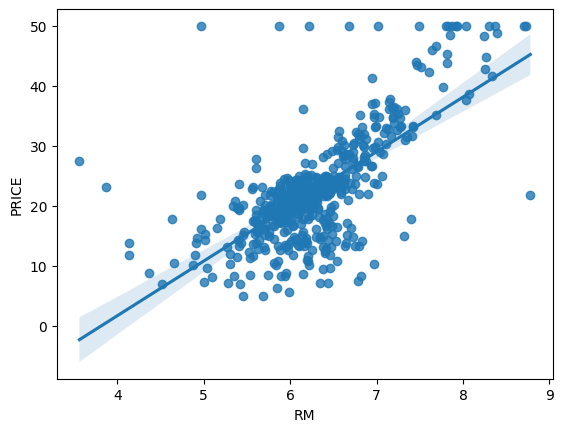

In [5]:
sns.regplot(x='RM',y='PRICE',data=df) # this is positively correleated # Similarly we can take any other feature

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

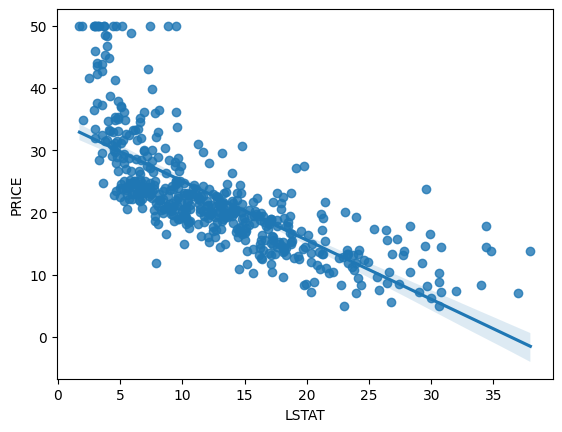

In [6]:
sns.regplot(x='LSTAT',y='PRICE',data=df) # This is negatively correlated

<AxesSubplot:xlabel='CHAS', ylabel='PRICE'>

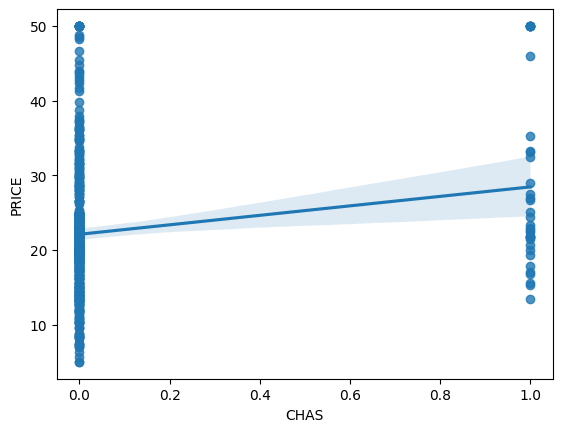

In [7]:
sns.regplot(x='CHAS',y='PRICE',data=df) # This is notatall correlated 
# it is important that linearity should definitly present in our dataset linearity basically means if x is 
# increasing y is increasing (or) if x is decreasing y is increasing to create a better regression model

In [8]:
# splitting the data into dependent and independent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [10]:
# Standardizing the dataset
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # for the test data we just need to transform

In [11]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train) # in order to train our model
# once we do fit on that dataset we create a hyperplane

LinearRegression()

In [12]:
# whenever we solve a regression problem the two important things are coefficients and intercept
print(regression.coef_) # the number of coefficients will always be equall to the number of independent features because 
# for every independent we will have the coefficient
print(regression.intercept_)

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
23.01581920903955


In [13]:
# To find on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

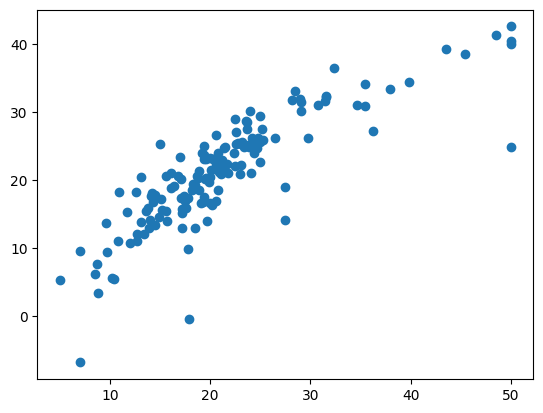

In [14]:
# Predection using test data
reg_pred = regression.predict(X_test) 
reg_pred # prediction we got from our model
plt.scatter(y_test,reg_pred) # plotting original values and the predected values if the graph is linear then model is good

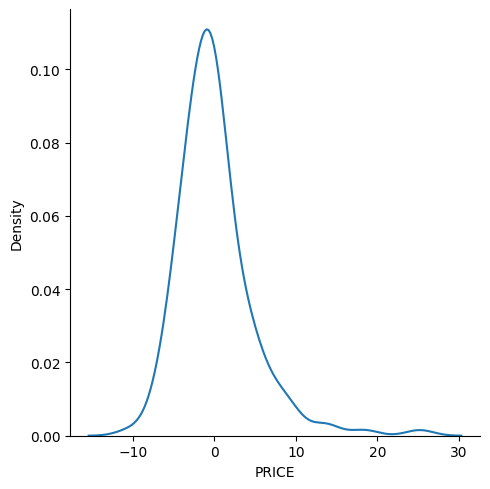

In [15]:
# calculating residuals 
# here residuals is errors with respect to y_test and reg_pred 
residuals = y_test-reg_pred
residuals
# plotting the residuals
sns.displot(residuals,kind="kde") # whenever we do this kind of plot with residuals we should get normal distribution

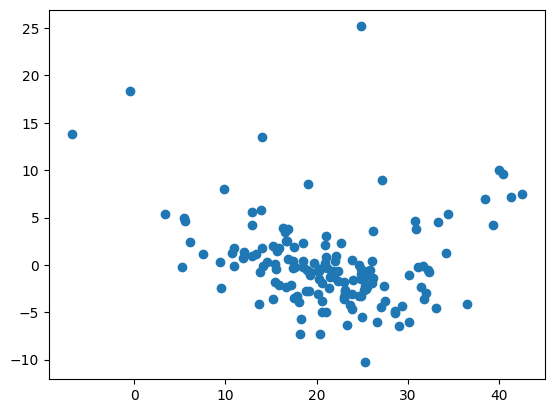

In [16]:
# Scatter plot with respect to prediction and residuals
plt.scatter(reg_pred,residuals) # uniform distribution

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
# Mean Squared Error (MSE) is a commonly used metric to evaluate the performance of a regression model. 
# It measures the average squared difference between the predicted values and the actual values of the target variable.
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
# To find the root mean squared error
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

# calculating R^2 error
from sklearn.metrics import r2_score
score = r2_score(y_test,reg_pred)
print(score*100)
# calculating adjusted r^2 there is no library for calculating adjusted r^2
adj_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1) # Formula
print(adj_r2*100)

21.51744423117721
3.162709871457406
4.6386899261728205
71.12260057484932
68.40226584639308


In [18]:
# Prediction for new data
bost.data[0].reshape(1,-1)
# we are doing this because before we the data in a 2D but here the data is in 1d so we are
# reshaping the data into 2D

array([[6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]])

In [19]:
# Transforming the data
scaler.transform(bost.data[0].reshape(1,-1))

c:\MLProjects\bostonprediction\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[-0.41709233,  0.29216419, -1.27338003, -0.28154625, -0.16513629,
         0.34715902, -0.13030059,  0.15267164, -0.97798895, -0.66777595,
        -1.32142483,  0.42854113, -1.04769976]])

In [20]:
# Predicting
regression.predict(scaler.transform(bost.data[0].reshape(1,-1)))

c:\MLProjects\bostonprediction\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([30.08649576])

In [21]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

# Pickling the model file for deployment

In [22]:
# Pickle is a serialized format file so that it can be deployed in any server  

import pickle
pickle.dump(regression,open('regmodel.pkl','wb'))   # inorder to convert this file into a pickle file wb - write binary
# 1. first parameter is the object
# 2. file Second comma represents on which file i am going to put(or) pickle this entire object
# 3. Indicates that this should be opened in the write byte mode it says that if the file does not exists in the local folder 
# in which folder the file is running in the same folder it will create a pickle file

In [23]:
pickled_model = pickle.load(open('regmodel.pkl','rb')) # rb means read byte mode
pickled_model.predict(scaler.transform(bost.data[0].reshape(1,-1)))

c:\MLProjects\bostonprediction\venv\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([30.08649576])